
|  |
| ------------------------------------------------------- | 
| ![Tremplin des sciences](images/tremplinColorSmall.png) | 

Cahier d'exercices pour l'enseignement du changement climat climatique ou l'apprentissage de programmation issu de la collection "Climat et météo tremplin pour l'enseignement des sciences" (PIA IFÉ ENS de Lyon - Météofrance ENM Toulouse). Le dispositif clef en main repose sur l'utilisation d'une RaspberryPi chargée avec le système d'exploitation Debian enrichi, produit par le projet. Les sources et les exécutables sont accessibles dans [l'espace collaboratif du pojet à l'IFÉ ENS de Lyon](https://contrib-tremplin.ens-lyon.fr/) et une copie se trouve dans [l'espace collaboratif de la forge github](https://github.com/g-vidal/CahierDeProgrammes); plus d'information sur les [blogs d'accompagnement](http://blog.climatetmeteo.fr/GerardVidal/) systèmes d'exploitation sur [la page des OS  de Raspberries Pi](http://mediaserv.climatetmeteo.fr/images/RaspBerry/DebianStretchPi3/).  Toutes les ressources issues du projet sont fournies sous licence [Creative Commons](https://creativecommons.org/licenses/by-nc/4.0/) ou sous les licences libres d'origine des outils utilisés. 

Les ressources  du projet **peuvent être utilisées dans tout autre environnement compatible**, notamment tous les cahiers d'exercices peuvent être exécutés sur toute machine disposant d'un python3  et des bibliothèques jupyter, jupyterlab, numpy, netcdf4. 

Les données _pré-traitées_ utilisées ci-dessous sont **accessibles  en ligne** sur le [serveur de données géolocalisées](http://geoloc-tremplin.ens-lyon.fr/climato-data/) `opendap` du projet tremplin.

![licence : Creative Commons](images/Licence.jpg) 

Auteur : G. Vidal

------------------------------------------------------------

# Une approche des enseignements autour du changement climatique : mitigation et adaptation au changement
# _Phase 3 : Approche du changement climatique à Lyon : évolution des températures maximales, minimales et de la pluviométrie jusqu'en 2100_

Ce cahier d'exercices utilise  les données collectées par le projet Tremplin sur la ville de Lyon et ses environs à partir du [projet DRIAS](http://www.drias-climat.fr/), converties pré-traitées et mises en ligne  sur le [serveur de données climatologiques](http://geoloc-tremplin.ens-lyon.fr/climato-data/Lyon-1/tsmaxLyon-26-45-85.nc.info) du projet Tremplin des sciences. Les conversions et pré-traitements ont été réalisés avec les cahiers de programme `ipython` des phases 1 & 2 de cette série disponibles sur la [forge du projet](https://contrib-tremplin.ens-lyon.fr/forge/Tremplin-des-Sciences/CahiersDeProgrammesClimat/files/tip/). Ce cahier propose plusieurs voies d'exploration du jeu de données _température max / température min / pluviométrie_ sur une grille de 80 x 80 km autour de Lyon . 

L'étude aborde l'évolution des variables sur N années (N vaut 30 par défaut mais peut être modifié)  sur 4 noeuds centrés sur la ville de Lyon. 

Le lot utilisé  est issu des trois modélisation RCP 2.6 4.5 et 8.5 fournies par météofrance. Ce cahier est immédiatement opérationnel et peut directement être exécuté sur un  `jupyter` ou `jupyterlab`, toutefois il manipule des données multidimensionnelles et doit être réservé à des étudiants avancés si l'on souhaite analyser le code. L'utilisation des blocs concernant le tracé des courbes ou des cartes est d'un usage facile d'accès et permet d'obtenir simplement des figures. Attention le dessin des figures a été désactivé dans le dépôt sur la forge pour ne pas alourdir inutilement le fichier transféré, il suffit de décommenter la dervière liigne des blocs en enlevant le `"`.

## Préparation de l'environnement et ouverture du fichier de données

Importer d'abord le module `netcdf4` et `numpy`, attention les majuscules sont impératives pour le nom `netCDF4`. Ces deux modules permettent de traiter  les fichiers multidimensionnels au format netCDF utilisés dans le monde de la météorologie et de l'océanographie principalement.

In [14]:
import netCDF4 as nc
import numpy as np
from datetime import datetime
from array import array
import sys, datetime, os

Importation des données de températures depuis le fichier obtenu auprès du [serveur de données climatologiques](http://geoloc-tremplin.ens-lyon.fr/climato-data/Lyon-1/tsmaxLyon-26-45-85.nc.info) du projet Tremplin des sciences extrait du site [DRIAS](https://drias-prod.meteo.fr/okapi/accueil/okapiWebDrias/index.jsp) sur la région lyonnaise.

L'exemple utilisé ici a été réalisé avec une grille de 10 x 10 noeuds centrés sur la ville de Lyon, pour obtenir un jeu de données se reporter au manuel numérique réalisé par E. Le Jan et CArole Larose dans le cadre du projet "Climat et Météo Tremplin pour l'enseignement des sciences". Les instructions d'affichage commentées (pour la plupart) permettent de vérifier les propriétés  du fichier obtenu ainsi que les variables qui pourront être utilisées. Ces affichages sont facultatifs et peuvent être commentés sans conséquence pour la suite.

In [2]:
tMaxLyon = nc.Dataset('http://geoloc-tremplin.ens-lyon.fr/climato-data/Lyon-1/tmin-tmax-rstr_Lyon_26-45-85.nc')
#tMaxLyon = nc.Dataset('tmin-tmax-rstr_Lyon_26-45-85.nc') #to use local file
print('Description des données issues du modèle : \n',tMaxLyon,'\n') 
print('Variables disponibles :',tMaxLyon.variables.keys()) # get all variable names
#print('Taille du tableau tasmax :',tMaxLyon.variables['tasmax'].shape ,'\n') 

Description des données issues du modèle : 
 <class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    title: Extrait TSMax par moyenne mensuelle de 2006 a 2100 Lyon et sa region
    institution: ENS de Lyon
    institute_id: IFE Institut Francais de l Education
    project_id: Climat et meteo tremplin pour l enseignement des sciences
    model_id: CNRM-ALADIN52
    product: output derived from Meteofrance DRIAS data
    contact: gerard.vidal@ens-lyon.fr
    creation_date: 2019-07-02 07:52:16.081986
    driving_experiment_name: DRIAS2014
    experiment: RCP2.6 RCP4.5 RCP8.5 
    model: ALADIN-Climat
    author: Gerard Vidal
    comment: Extraction des moyennes de la region Lyonnaise de 2006 a 2100 et changegement des variables
    dimensions(sizes): i(10), j(10), maxStrlen64(64), month(13), year(95)
    variables(dimensions): int32 i(i), int32 j(j), |S1 month(month,maxStrlen64), int32 year(year), float32 tmax_26(year,month,j,i), float32 tmax_45(y

## Liste des dimensions et des variables du système de données

À partir de la liste des variables obtenue ci-dessus on renomme les jeux de données de chacune des variables qui seront exploitées apour effectuer les calculs et contrôle de la taille des échantillons. Les affichages proposés permettent de contrôler que les paramètres présents sont effectivement ceux qui sont attendus.

In [3]:
for dim in tMaxLyon.dimensions.items():
    print(dim)
print ('Variables \t  Forme \t\t Taille \t type :  \n')
for var in tMaxLyon.variables.keys() :
    print (var, '\t\t', 
           tMaxLyon.variables[var].dimensions, '\t\t', 
           tMaxLyon.variables[var].shape, '\t', 
           tMaxLyon.variables[var].dtype)


('i', <class 'netCDF4._netCDF4.Dimension'>: name = 'i', size = 10
)
('j', <class 'netCDF4._netCDF4.Dimension'>: name = 'j', size = 10
)
('maxStrlen64', <class 'netCDF4._netCDF4.Dimension'>: name = 'maxStrlen64', size = 64
)
('month', <class 'netCDF4._netCDF4.Dimension'>: name = 'month', size = 13
)
('year', <class 'netCDF4._netCDF4.Dimension'>: name = 'year', size = 95
)
Variables 	  Forme 		 Taille 	 type :  

i 		 ('i',) 		 (10,) 	 int32
j 		 ('j',) 		 (10,) 	 int32
month 		 ('month', 'maxStrlen64') 		 (13, 64) 	 |S1
year 		 ('year',) 		 (95,) 	 int32
tmax_26 		 ('year', 'month', 'j', 'i') 		 (95, 13, 10, 10) 	 float32
tmax_45 		 ('year', 'month', 'j', 'i') 		 (95, 13, 10, 10) 	 float32
tmax_85 		 ('year', 'month', 'j', 'i') 		 (95, 13, 10, 10) 	 float32
tmin_26 		 ('year', 'month', 'j', 'i') 		 (95, 13, 10, 10) 	 float32
tmin_45 		 ('year', 'month', 'j', 'i') 		 (95, 13, 10, 10) 	 float32
tmin_85 		 ('year', 'month', 'j', 'i') 		 (95, 13, 10, 10) 	 float32
rstr_26 		 ('year', 'month

## Création des tableaux de calcul

In [4]:
lyon_tmax26 = tMaxLyon.variables['tmax_26']  # variable temperature 
lyon_tmax45 = tMaxLyon.variables['tmax_45']  # variable temperature 
lyon_tmax85 = tMaxLyon.variables['tmax_85']  # variable temperature 
lyon_tmin26 = tMaxLyon.variables['tmin_26']  # variable temperature 
lyon_tmin45 = tMaxLyon.variables['tmin_45']  # variable temperature 
lyon_tmin85 = tMaxLyon.variables['tmin_85']  # variable temperature 
lyon_rstr26 = tMaxLyon.variables['rstr_26']  # variable temperature 
lyon_rstr45 = tMaxLyon.variables['rstr_45']  # variable temperature 
lyon_rstr85 = tMaxLyon.variables['rstr_85']  # variable temperature 
lyon_rstrc26 = tMaxLyon.variables['rstrc_26']  # variable temperature 
lyon_rstrc45 = tMaxLyon.variables['rstrc_45']  # variable temperature 
lyon_rstrc85 = tMaxLyon.variables['rstrc_85']  # variable temperature 
lyon_month = nc.chartostring(tMaxLyon.variables['month'][:])  # variable temps
#lyon_month = tMaxLyon.variables['month'] #if local file type = string
lyon_year = tMaxLyon.variables['year']  # variable temps

#test = nc.chartostring(tMaxLyon.variables['month'][:])
#print(test)
#test[:] = nc.chartostring(tMaxLyon.variables['month'][:],encoding='utf-8')
#print(test)

lyon_lat,lyon_lon = tMaxLyon.variables['lat'], tMaxLyon.variables['lon']  # latitude longitude
lyon_x,lyon_y = tMaxLyon.variables['x'], tMaxLyon.variables['y']  # coordonnées métriques
lyon_gridi,lyon_gridj = tMaxLyon.variables['i'], tMaxLyon.variables['j'] # coordonnées grille Aladin

lenmonths = lyon_month.shape[0]

#print ('\n Taille des tableaux de calcul : \n', 
#       '\ntmax26 : ', lyon_tmax26.shape, lyon_tmax26[44,7,5,5],tMaxLyon.variables['temp_26'][44,7,5,5],
#       '\ntmax45 : ', lyon_tmax45.shape, lyon_tmax45[44,7,5,5],tMaxLyon.variables['temp_45'][44,7,5,5],
#       '\ntmax85 : ', lyon_tmax85.shape, lyon_tmax85[44,7,5,5],tMaxLyon.variables['temp_85'][44,7,5,5],
#       '\n\nyear : ', lyon_year.shape, lyon_year[:],
#       '\nmonth : ', lyon_month.shape, lyon_month[:],
#       '\n\nLat : ', lyon_lat.shape,  lyon_lat[0,:],
#       '\nLon : ', lyon_lon.shape, lyon_lon[0,:],
#       '\n\nX : ', lyon_x.shape, lyon_x[:],
#       '\nY : ', lyon_y.shape, lyon_y[:],
#       '\n\ni : ', lyon_gridi.shape, lyon_gridi[:],
#       '\nj : ', lyon_gridj.shape, lyon_gridj[:])

Définition et affectation des variables où sont copiées les données conservées et où seront stockés les résultats des calculs. (La syntaxe du fichier netCDF reste à  vérifier). Les années seront calculées pendant le calcul principal, les affichages permettent de vérifier la validité des données utilisées.









## Calcul principal des moyennes par mois pour chaque noeud et toutes les années


Le premier bloc de code permet de fixer les paramètres qui seront utilisés pour les calculs. les commentaires donnent des indications sur les valeurs possibles.

### Calculs pour une seule période de  `yearInterval` années

Calcul de la moyenne de températures d'une sélection de mois sur un intervalle de `yearInterval` années à partir de l'année `yearBegin` sur les noeuds allant de `(startj,starti)` de taille `(intervalj,intervali)`

#### préparation de la création de figures
On importe les bibliothèques plotly

In [5]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools

py.init_notebook_mode(connected=True)

## Courbes d'évolution de la température de 2036 à 2100
### Calculs pour UNE SÉRIE DE  PÉRIODES de  `yearInterval` années

Calcul de la moyenne de températures des mois de `calcMonth` (il peut y en avoir un seul ou un choix), sur `yearInterval` années à partir de l'année `yearBegin` jusqu'à l'année `yearBegin + yearPeriod` sur les noeuds à partir de `(startj,starti)` de taille `(intervalj,intervali)`. La valeur touvée est affectée à la dernière année de la plage de calcul.

In [6]:
# Variables de calcul
# Séquence d'années pendant lesquelles les calculs sont effectués
# Choix de l'année de départ  
# du nombre d'années sur lesquelles sont effectuées les moyennes
# Des mois choisis pour le calcul 0 = Jan; 7 = Aout
# yearbegin + yearperiod must be <= 2100
yearBegin = 2006
yearInterval = 30 
yearPeriod = 95
calcMonth = [0,7,12] # Calcul effectué pour Janvier (0) Aout (7) et moyenne annuelle (12)
lencalcMonths = len(calcMonth)
#  Grille i j
# sous espace de la grille 10X10 utilisé
#  le premier écantillon est un carré 2X2 au centre de la grille
# Le second échantillon est toute la grille entière
starti = 4
intervali = 2
startj = 4
intervalj = 2 # Calcul sur un carré de 16km de côté au centre de la carte (ville de Lyon)
#starti = 0
#intervali = 10
#startj = 0
#intervalj = 10
# Variables de calcul
startYear = yearBegin - 2006
endYear = startYear + yearInterval
#print(yearPeriodInterval)
endi = starti + intervali
endj = startj + intervalj
                          
if not  (startYear >= 0) and (endYear <= lenyears) :
    print('starting year or finishing year out of bounds')
    sys.exit('giving up on year bounds')
#print(gridj[loc_j])
#print(gridi[loc_i])
#print(startYear,':',endYear,',',calcMonth,',',startj,':',endj,',',starti,':',endi)
#print(temp.shape)
#print(np.mean(temp[startYear:endYear,calcMonth,startj:endj,starti:endi]))

### Calcul pour n mois sur p périodes de q années pour la zone

Calcul de la moyenne des températures mensuelles sur `yearInterval` ans pendant une période de `yearPeriod` années successives pour une sélection de `calcMonth`  mois.

In [7]:
# Using online file takes a little more time
moyMAreaInterval_26 = np.zeros((lencalcMonths,yearPeriod))
moyMAreaInterval_45 = np.zeros((lencalcMonths,yearPeriod))
moyMAreaInterval_85 = np.zeros((lencalcMonths,yearPeriod))
yearPeriodM = yearPeriod - yearInterval
# Tmax and (i,j) means are computed to localize the mean
for p in range(yearPeriodM) :
    a = startYear + p
    b = endYear + p    
    moyMAreaInterval_26[:,p] = np.mean(lyon_tmax26[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
    moyMAreaInterval_45[:,p] = np.mean(lyon_tmax45[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
    moyMAreaInterval_85[:,p] = np.mean(lyon_tmax85[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
firstPlotYear = startYear + yearInterval
lastPlotYear = firstPlotYear + yearPeriodM
data = [] * lencalcMonths
trace = [] * lencalcMonths

Le diagramme ci-dessous  représente l'évolution sur `yearPeriod` années de la température dans la région Lyonnaise.(Décommenter la dernière ligne du bloc pour afficher la figure)

In [8]:
q = 0
trace26_0 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_26[q,:],
    name ='Moyenne 2.6 du mois %s'%lyon_month[calcMonth[q]]
)
trace45_0 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_45[q,:],
    name ='Moyenne 4.5 du mois %s'%lyon_month[calcMonth[q]]
)
trace85_0 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_85[q,:],
    name ='Moyenne 8.5 du mois %s'%lyon_month[calcMonth[q]]
)

q = 1
trace26_1 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_26[q,:],
    name ='Moyenne 2.6 du mois %s'%lyon_month[calcMonth[q]]
)
trace45_1 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_45[q,:],
    name ='Moyenne 4.5 du mois %s'%lyon_month[calcMonth[q]]
)

trace85_1 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_85[q,:],
    name ='Moyenne 8.5 du mois %s'%lyon_month[calcMonth[q]]
)

q = 2
trace26_2 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_26[q,:],
    name ="Moyenne 2.6 de l'année"
)
trace45_2 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_45[q,:],
    name ="Moyenne 4.5 de l'année"
)

trace85_2 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_85[q,:],
    name ="Moyenne 8.5 de l'année"
)

fig = tools.make_subplots(rows=3, 
                          cols=1, 
                          subplot_titles=("mois de janvier ","mois d'aout","max de l'année"))

fig.append_trace(trace26_0, 1, 1)
fig.append_trace(trace45_0, 1, 1)
fig.append_trace(trace85_0, 1, 1)
fig.append_trace(trace26_1, 2, 1)
fig.append_trace(trace45_1, 2, 1)
fig.append_trace(trace85_1, 2, 1)
fig.append_trace(trace26_2, 3, 1)
fig.append_trace(trace45_2, 3, 1)
fig.append_trace(trace85_2, 3, 1)

fig['layout']['xaxis1'].update(title='Year')
fig['layout']['xaxis2'].update(title='Year')
fig['layout']['xaxis3'].update(title='Year')
fig['layout']['yaxis1'].update(title='Degrees C')
fig['layout']['yaxis2'].update(title='Degrees C')
fig['layout']['yaxis3'].update(title='Degrees C')
fig['layout']['margin'] = {'l': 50, 'r': 10, 'b': 50, 't': 50}
fig['layout'].update(autosize = False, height=1200, width=900, title='Températures maximales moyennées sur 30 ans\n')

#py.iplot(fig, filename='basic-line')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]



Layout({
    'annotations': [{'font': {'size': 16},
                     'showarrow': False,
                     'text': 'mois de janvier ',
                     'x': 0.5,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 1.0,
                     'yanchor': 'bottom',
                     'yref': 'paper'},
                    {'font': {'size': 16},
                     'showarrow': False,
                     'text': "mois d'aout",
                     'x': 0.5,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 0.6111111111111112,
                     'yanchor': 'bottom',
                     'yref': 'paper'},
                    {'font': {'size': 16},
                     'showarrow': False,
                     'text': "max de l'année",
                     'x': 0.5,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 0

In [9]:
# Using online file takes a little more time
moymAreaInterval_26 = np.zeros((lencalcMonths,yearPeriod))
moymAreaInterval_45 = np.zeros((lencalcMonths,yearPeriod))
moymAreaInterval_85 = np.zeros((lencalcMonths,yearPeriod))
yearPeriodm = yearPeriod - yearInterval
for p in range(yearPeriodm) :
    a = startYear + p
    b = endYear + p    
    moymAreaInterval_26[:,p] = np.mean(lyon_tmin26[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
    moymAreaInterval_45[:,p] = np.mean(lyon_tmin45[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
    moymAreaInterval_85[:,p] = np.mean(lyon_tmin85[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
#print(moyAreaInterval)
firstPlotYear = startYear + yearInterval
lastPlotYear = firstPlotYear + yearPeriodm
data = [] * lencalcMonths
trace = [] * lencalcMonths

Le diagramme ci-dessous  représente l'évolution sur `yearPeriod` années de la température dans la région Lyonnaise.(Décommenter la dernière ligne du bloc pour afficher la figure)

In [10]:
q = 0
trace26_0 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_26[q,:],
    name ='Moyenne 2.6 du mois %s'%lyon_month[calcMonth[q]]
)
trace45_0 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_45[q,:],
    name ='Moyenne 4.5 du mois %s'%lyon_month[calcMonth[q]]
)
trace85_0 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_85[q,:],
    name ='Moyenne 8.5 du mois %s'%lyon_month[calcMonth[q]]
)

q = 1
trace26_1 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_26[q,:],
    name ='Moyenne 2.6 du mois %s'%lyon_month[calcMonth[q]]
)
trace45_1 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_45[q,:],
    name ='Moyenne 4.5 du mois %s'%lyon_month[calcMonth[q]]
)

trace85_1 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_85[q,:],
    name ='Moyenne 8.5 du mois %s'%lyon_month[calcMonth[q]]
)

q = 2
trace26_2 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_26[q,:],
    name ='Moyenne 2.6 du mois %s'%lyon_month[calcMonth[q]]
)
trace45_2 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_45[q,:],
    name ='Moyenne 4.5 du mois %s'%lyon_month[calcMonth[q]]
)

trace85_2 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_85[q,:],
    name ='Moyenne 8.5 du mois %s'%lyon_month[calcMonth[q]]
)

fig = tools.make_subplots(rows=3, 
                          cols=1, 
                          subplot_titles=("mois de janvier",
                                          "mois d'aout",
                                          "minimum de l'année"))

fig.append_trace(trace26_0, 1, 1)
fig.append_trace(trace45_0, 1, 1)
fig.append_trace(trace85_0, 1, 1)
fig.append_trace(trace26_1, 2, 1)
fig.append_trace(trace45_1, 2, 1)
fig.append_trace(trace85_1, 2, 1)
fig.append_trace(trace26_2, 3, 1)
fig.append_trace(trace45_2, 3, 1)
fig.append_trace(trace85_2, 3, 1)


fig['layout']['xaxis1'].update(title='Year')
fig['layout']['xaxis2'].update(title='Year')
fig['layout']['xaxis3'].update(title='Year')
fig['layout']['yaxis1'].update(title='Degrees C')
fig['layout']['yaxis2'].update(title='Degrees C')
fig['layout']['yaxis3'].update(title='Degrees C')
fig['layout']['margin'] = {'l': 50, 'r': 10, 'b': 50, 't': 50}
fig['layout'].update(height=1200, width=900, title='Températures minimales moyennées sur 30 ans')

#py.iplot(fig, filename='basic-line')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]



Layout({
    'annotations': [{'font': {'size': 16},
                     'showarrow': False,
                     'text': 'mois de janvier',
                     'x': 0.5,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 1.0,
                     'yanchor': 'bottom',
                     'yref': 'paper'},
                    {'font': {'size': 16},
                     'showarrow': False,
                     'text': "mois d'aout",
                     'x': 0.5,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 0.6111111111111112,
                     'yanchor': 'bottom',
                     'yref': 'paper'},
                    {'font': {'size': 16},
                     'showarrow': False,
                     'text': "minimum de l'année",
                     'x': 0.5,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y'

In [11]:
# Using online file takes a little more time
moypAreaInterval_26 = np.zeros((lencalcMonths,yearPeriod))
moypAreaInterval_45 = np.zeros((lencalcMonths,yearPeriod))
moypAreaInterval_85 = np.zeros((lencalcMonths,yearPeriod))
yearPeriodp = yearPeriod - yearInterval
for p in range(yearPeriodp) :
    a = startYear + p
    b = endYear + p    
    moypAreaInterval_26[:,p] = np.mean(lyon_rstr26[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
    moypAreaInterval_45[:,p] = np.mean(lyon_rstr45[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
    moypAreaInterval_85[:,p] = np.mean(lyon_rstr85[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
#print(moyAreaInterval)
firstPlotYear = startYear + yearInterval
lastPlotYear = firstPlotYear + yearPeriodp
data = [] * lencalcMonths
trace = [] * lencalcMonths

In [12]:
q = 0
trace26_0 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moypAreaInterval_26[q,:],
    name ='Moyenne 2.6 du mois %s'%lyon_month[calcMonth[q]],
)
trace45_0 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moypAreaInterval_45[q,:],
    name ='Moyenne 4.5 du mois %s'%lyon_month[calcMonth[q]],
)
trace85_0 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moypAreaInterval_85[q,:],
    name ='Moyenne 8.5 du mois %s'%lyon_month[calcMonth[q]],
)

q = 1
trace26_1 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moypAreaInterval_26[q,:],
    name ='Moyenne 2.6 du mois %s'%lyon_month[calcMonth[q]],
)
trace45_1 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moypAreaInterval_45[q,:],
    name ='Moyenne 4.5 du mois %s'%lyon_month[calcMonth[q]],
)

trace85_1 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moypAreaInterval_85[q,:],
    name ='Moyenne 8.5 du mois %s'%lyon_month[calcMonth[q]],
    opacity=0.75
)

q = 2
trace26_2 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moypAreaInterval_26[q,:],
    name ='Moyenne 2.6 du mois %s'%lyon_month[calcMonth[q]],
)
trace45_2 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moypAreaInterval_45[q,:],
    name ='Moyenne 4.5 du mois %s'%lyon_month[calcMonth[q]],
)

trace85_2 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moypAreaInterval_85[q,:],
    name ='Moyenne 8.5 du mois %s'%lyon_month[calcMonth[q]],
)

fig = tools.make_subplots(rows=3, 
                          cols=1, 
                          subplot_titles=("mois de janvier",
                                          "mois d'aout",
                                          "moyenne mensuelle sur l'année"))

fig.append_trace(trace26_0, 1, 1)
fig.append_trace(trace45_0, 1, 1)
fig.append_trace(trace85_0, 1, 1)
fig.append_trace(trace26_1, 2, 1)
fig.append_trace(trace45_1, 2, 1)
fig.append_trace(trace85_1, 2, 1)
fig.append_trace(trace26_2, 3, 1)
fig.append_trace(trace45_2, 3, 1)
fig.append_trace(trace85_2, 3, 1)

fig['layout']['xaxis1'].update(title='Année')
fig['layout']['xaxis2'].update(title='Année')
fig['layout']['xaxis3'].update(title='Année')
fig['layout']['yaxis1'].update(title='mm of rain')
fig['layout']['yaxis2'].update(title='mm of rain')
fig['layout']['yaxis3'].update(title='mm of rain')
fig['layout'].update(height=1200, width=900, title='Précipitations moyennées sur 30 ans')
#fig['layout']['margin'] = {'l': 50, 'r': 10, 'b': 50, 't': 50}
#fig['layout'].update(title='Température moyenne maximale du mois de juillet', 
#                     autosize=False, width=800, height=380)  

#py.iplot(fig, filename='basic-line')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]



Layout({
    'annotations': [{'font': {'size': 16},
                     'showarrow': False,
                     'text': 'mois de janvier',
                     'x': 0.5,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 1.0,
                     'yanchor': 'bottom',
                     'yref': 'paper'},
                    {'font': {'size': 16},
                     'showarrow': False,
                     'text': "mois d'aout",
                     'x': 0.5,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 0.6111111111111112,
                     'yanchor': 'bottom',
                     'yref': 'paper'},
                    {'font': {'size': 16},
                     'showarrow': False,
                     'text': "moyenne mensuelle sur l'année",
                     'x': 0.5,
                     'xanchor': 'center',
                     'xref': 'paper',
             

In [13]:
# Using online file takes a little more time
moycAreaInterval_26 = np.zeros((lencalcMonths,yearPeriod))
moycAreaInterval_45 = np.zeros((lencalcMonths,yearPeriod))
moycAreaInterval_85 = np.zeros((lencalcMonths,yearPeriod))
yearPeriodp = yearPeriod - yearInterval
for p in range(yearPeriodp) :
    a = startYear + p
    b = endYear + p    
    moycAreaInterval_26[:,p] = np.mean(lyon_rstrc26[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
    moycAreaInterval_45[:,p] = np.mean(lyon_rstrc45[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
    moycAreaInterval_85[:,p] = np.mean(lyon_rstrc85[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
#print(moyAreaInterval)
firstPlotYear = startYear + yearInterval
lastPlotYear = firstPlotYear + yearPeriodp
data = [] * lencalcMonths
trace = [] * lencalcMonths

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]



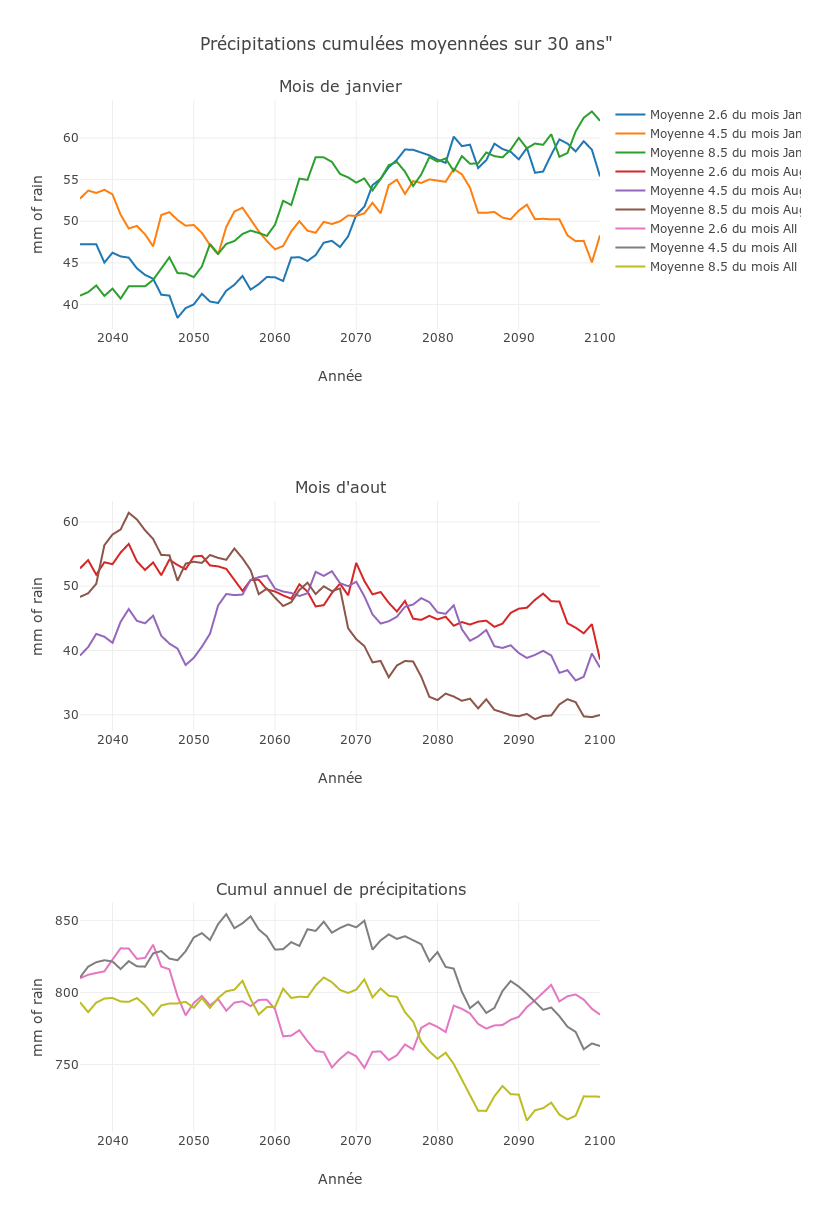

In [14]:
q = 0
trace26_0 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moycAreaInterval_26[q,:],
    name ='Moyenne 2.6 du mois %s'%lyon_month[calcMonth[q]],
)
trace45_0 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moycAreaInterval_45[q,:],
    name ='Moyenne 4.5 du mois %s'%lyon_month[calcMonth[q]],
)
trace85_0 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moycAreaInterval_85[q,:],
    name ='Moyenne 8.5 du mois %s'%lyon_month[calcMonth[q]],
)

q = 1
trace26_1 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moycAreaInterval_26[q,:],
    name ='Moyenne 2.6 du mois %s'%lyon_month[calcMonth[q]],
    xaxis='x2',
    yaxis='y2'

)
trace45_1 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moycAreaInterval_45[q,:],
    name ='Moyenne 4.5 du mois %s'%lyon_month[calcMonth[q]],
    xaxis='x2',
    yaxis='y2'
)

trace85_1 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moycAreaInterval_85[q,:],
    name ='Moyenne 8.5 du mois %s'%lyon_month[calcMonth[q]],    
    xaxis='x2',
    yaxis='y2'
)

q = 2
trace26_2 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moycAreaInterval_26[q,:],
    name ='Moyenne 2.6 du mois %s'%lyon_month[calcMonth[q]],
    xaxis='x2',
    yaxis='y2'

)
trace45_2 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moycAreaInterval_45[q,:],
    name ='Moyenne 4.5 du mois %s'%lyon_month[calcMonth[q]],
    xaxis='x2',
    yaxis='y2'
)

trace85_2 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moycAreaInterval_85[q,:],
    name ='Moyenne 8.5 du mois %s'%lyon_month[calcMonth[q]],    
    xaxis='x2',
    yaxis='y2'
)

fig = tools.make_subplots(rows=3, 
                          cols=1,
                          subplot_titles=("Mois de janvier",
                                          "Mois d'aout",
                                          "Cumul annuel de précipitations")
)

fig.append_trace(trace26_0, 1, 1)
fig.append_trace(trace45_0, 1, 1)
fig.append_trace(trace85_0, 1, 1)
fig.append_trace(trace26_1, 2, 1)
fig.append_trace(trace45_1, 2, 1)
fig.append_trace(trace85_1, 2, 1)
fig.append_trace(trace26_2, 3, 1)
fig.append_trace(trace45_2, 3, 1)
fig.append_trace(trace85_2, 3, 1)
fig['layout']['xaxis1'].update(title='Année')
fig['layout']['xaxis2'].update(title='Année')
fig['layout']['xaxis3'].update(title='Année')
fig['layout']['yaxis1'].update(title='mm of rain')
fig['layout']['yaxis2'].update(title='mm of rain')
fig['layout']['yaxis3'].update(title='mm of rain')
fig['layout'].update(height=1200, width=1000, title='Précipitations cumulées moyennées sur 30 ans"')

#py.iplot(fig, filename='basic-line')

## Approche cartographique des températures aux environs de Lyon

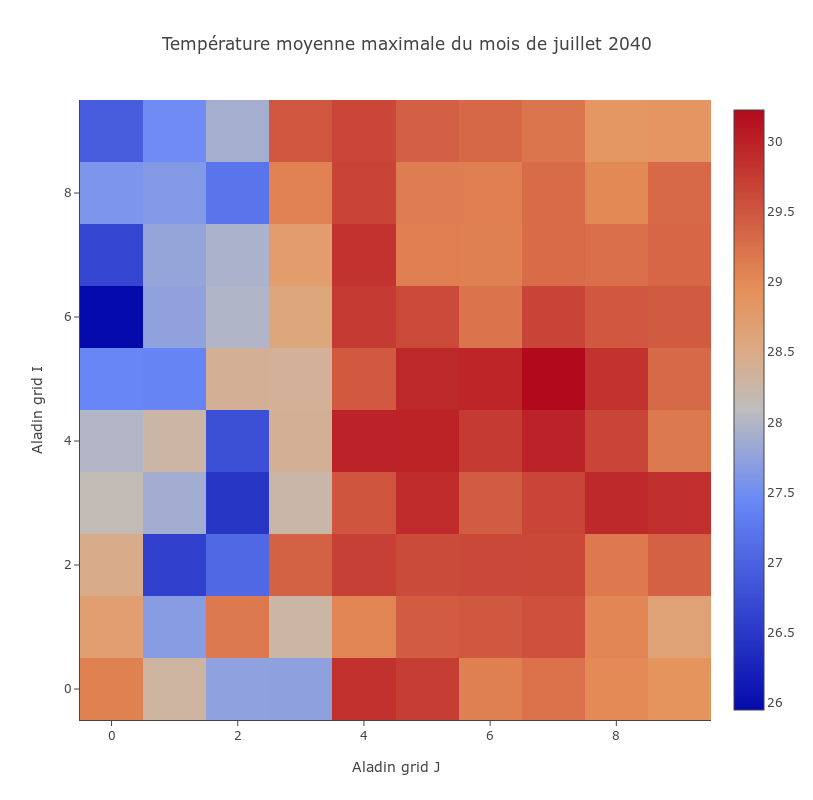

In [15]:
trace0 = go.Heatmap(z=lyon_tmax26[34,6,:,:].tolist())
data=[trace0]
layout = dict (
    title = "Température moyenne maximale du mois de juillet 2040",
    autosize=False,
    width=800,
    height=800,        
    xaxis = dict(
        title = 'Aladin grid J',
        showline=True,
        showticklabels=True,
        ticklen=5
    ),
    yaxis = dict(
        title = 'Aladin grid I',
        showline=True,
        showticklabels=True
    ),         
)
fig = dict(data=data, layout=layout)
#py.iplot(fig, filename='basic-heatmap')

#### Comparaison de 3 horizons pour le mois de juillet en région lyonnaise
Ce bloc utilise les données mises en forme dans le bloc précédent pour afficher une comparaison entre  3 horizons. (Décommenter la dernière ligne du bloc pour afficher la figure)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]
[ (2,1) x4,y4 ]  [ (2,2) x5,y5 ]  [ (2,3) x6,y6 ]
[ (3,1) x7,y7 ]  [ (3,2) x8,y8 ]  [ (3,3) x9,y9 ]



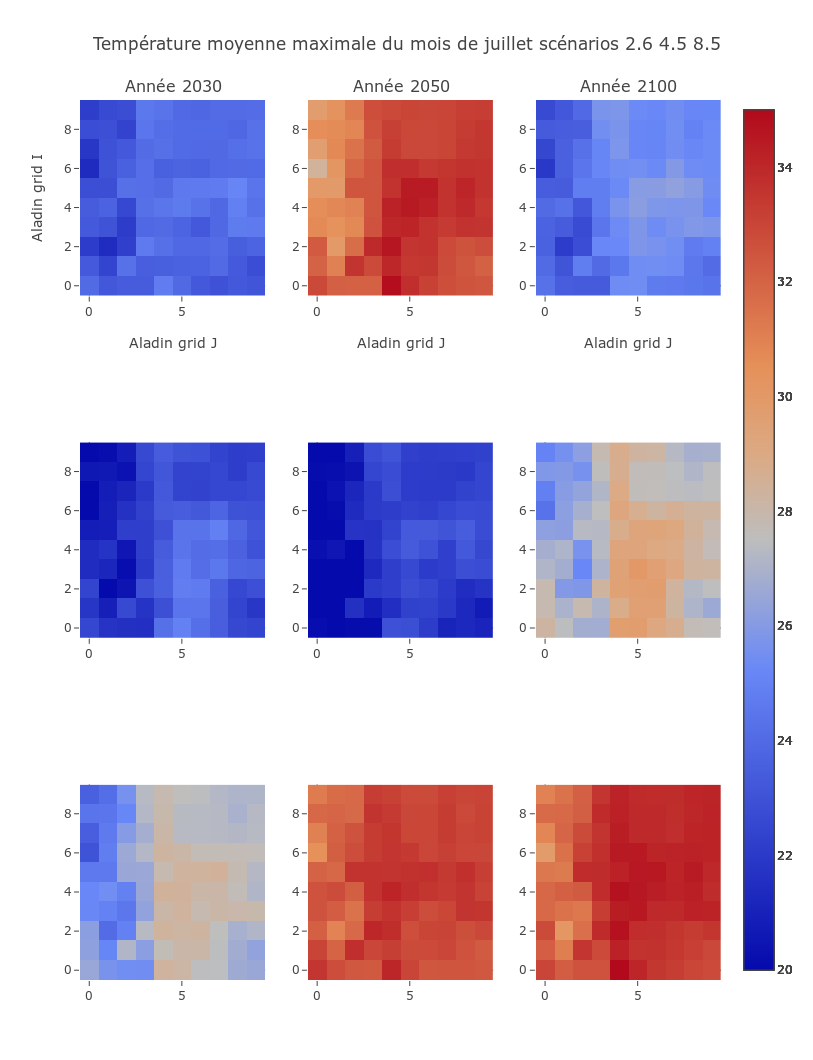

In [16]:
trace00 = go.Heatmap(z=lyon_tmax26[24,6,:,:].tolist(), zauto=False, zmin=20,zmax=35)
trace01 = go.Heatmap(z=lyon_tmax26[54,6,:,:].tolist(), zauto=False, zmin=20,zmax=35)
trace02 = go.Heatmap(z=lyon_tmax26[94,6,:,:].tolist(), zauto=False, zmin=20,zmax=35)
trace10 = go.Heatmap(z=lyon_tmax45[24,6,:,:].tolist(), zauto=False, zmin=20,zmax=35)
trace11 = go.Heatmap(z=lyon_tmax45[54,6,:,:].tolist(), zauto=False, zmin=20,zmax=35)
trace12 = go.Heatmap(z=lyon_tmax45[94,6,:,:].tolist(), zauto=False, zmin=20,zmax=35)
trace20 = go.Heatmap(z=lyon_tmax85[24,6,:,:].tolist(), zauto=False, zmin=20,zmax=35)
trace21 = go.Heatmap(z=lyon_tmax85[54,6,:,:].tolist(), zauto=False, zmin=20,zmax=35)
trace22 = go.Heatmap(z=lyon_tmax85[94,6,:,:].tolist(), zauto=False, zmin=20,zmax=35)

fig = tools.make_subplots(rows=3, cols=3, subplot_titles=('Année 2030','Année 2050','Année 2100'))

fig.append_trace(trace00, 1, 1)
fig.append_trace(trace01, 1, 2)
fig.append_trace(trace02, 1, 3)
fig.append_trace(trace10, 2, 1)
fig.append_trace(trace11, 2, 2)
fig.append_trace(trace12, 2, 3)
fig.append_trace(trace20, 3, 1)
fig.append_trace(trace21, 3, 2)
fig.append_trace(trace22, 3, 3)

fig['layout']['xaxis1'].update(title='Aladin grid J')
fig['layout']['xaxis2'].update(title='Aladin grid J')
fig['layout']['xaxis3'].update(title='Aladin grid J')
fig['layout']['yaxis1'].update(title='Aladin grid I')
fig['layout'].update(title='Température moyenne maximale du mois de juillet scénarios 2.6 4.5 8.5', 
                     autosize=False, width=800, height=1060)  

#py.iplot(fig, filename='basic-heatmap')

In [18]:
startYear = 44
endYear =74
slice = lenmonths - 1 # slice = lenmonths pour traiter en plus la moyenne annuelle 
moyAreaInterval1 = [None] * slice
moyAreaInterval2 = [None] * slice
moyAreaInterval3 = [None] * slice
moyAreaInterval1[:] = np.mean(lyon_tmax26[startYear:endYear,:,startj:endj,starti:endi],axis=(0,2,3)) 
moyAreaInterval2[:] = np.mean(lyon_tmax45[startYear:endYear,:,startj:endj,starti:endi],axis=(0,2,3)) 
moyAreaInterval3[:] = np.mean(lyon_tmax85[startYear:endYear,:,startj:endj,starti:endi],axis=(0,2,3)) 
#print(moyAreaInterval[0:slice])
with open('moyMonth.txt', 'w') as file :
    for p in range(slice) :
        file.write(lyon_month[p])
        file.write(';')
        file.write(str(moyAreaInterval1[p]))
        file.write(str(moyAreaInterval2[p]))
        file.write(str(moyAreaInterval3[p]))
        file.write('\n')

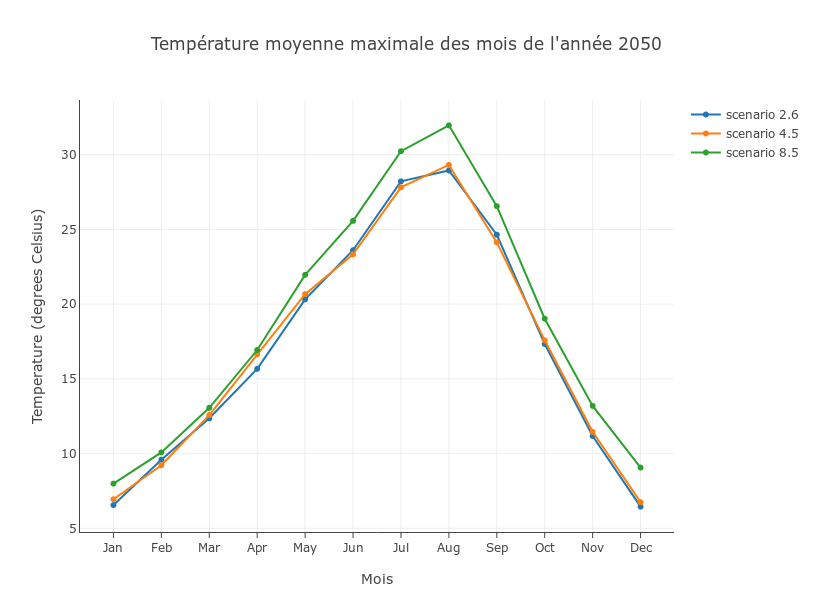

In [19]:
trace0 = go.Scatter(
    x = lyon_month[0:slice],
    y = moyAreaInterval1[0:slice],
    name ='scenario 2.6'
)
trace1 = go.Scatter(
    x = lyon_month[0:slice],
    y = moyAreaInterval2[0:slice],
    name ='scenario 4.5'
)
trace2 = go.Scatter(
    x = lyon_month[0:slice],
    y = moyAreaInterval3[0:slice],
    name ='scenario 8.5'
)

data = [trace0,trace1,trace2]

layout = dict (
           title = "Température moyenne maximale des mois de l'année 2050",
           xaxis = dict(
                 title = 'Mois',
                 showline=True,
                 showticklabels=True,
                 ticklen=5
             ),
             yaxis = dict(
                 title = 'Temperature (degrees Celsius)',
                 showline=True,
                 showticklabels=True
             ),
            height = 600,
            autosize=False, 
            width=850,
)


fig = dict(data=data, layout=layout)

#py.iplot(fig, filename='basic-line')

### Contrôle du contenu du fichier sauvegardé 
Ce bloc permet d'imprimer le contenu du jeu de données qui vient d'être sauvegardé afin de vérifier qu'il contient les données attendues. le suivant ferme le fichier écrit.

In [15]:
#for dim in extractLyonTempYearMonth.dimensions.items():
#    print(dim[1])
#for var in extractLyonTempYearMonth.variables.keys() :
#    print (var, '\t\t', extractLyonTempYearMonth.variables[var].dimensions, '\t\t', 
#           extractLyonTempYearMonth.variables[var].shape, '\t', extractLyonTempYearMonth.variables[var].dtype)